## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [6]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Dataset/Train/*')
#folders=2

In [9]:
folders

['/content/drive/My Drive/Dataset/Train/Uninfected',
 '/content/drive/My Drive/Dataset/Train/Parasite']

In [10]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense((folders), activation='softmax')(x)
# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from tensorflow.keras.layers import MaxPooling2D

In [14]:
### Create Model from scratch using CNN
# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50, ## Reducing epocs to save time, Should try with 50 epoch for better results
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 139s 8s/step - loss: 1.1818 - accuracy: 0.5649 - val_loss: 0.5920 - val_accuracy: 0.6940
Epoch 2/50
13/13 [==============================] - 6s 428ms/step - loss: 0.6085 - accuracy: 0.6851 - val_loss: 1.1744 - val_accuracy: 0.3806
Epoch 3/50
13/13 [==============================] - 6s 425ms/step - loss: 0.5072 - accuracy: 0.7428 - val_loss: 0.5415 - val_accuracy: 0.6791
Epoch 4/50
13/13 [==============================] - 6s 427ms/step - loss: 0.4450 - accuracy: 0.8029 - val_loss: 0.6364 - val_accuracy: 0.6716
Epoch 5/50
13/13 [==============================] - 6s 428ms/step - loss: 0.3123 - accuracy: 0.8846 - val_loss: 0.4334 - val_accuracy: 0.7761
Epoch 6/50
13/13 [==============================] - 6s 432ms/step - loss: 0.2845 - accuracy: 0.8942 - val_loss: 1.0151 - val_accuracy: 0.5597
Epoch 7/50
13/13 [==============================] - 6s 431ms/step - loss: 0.3003 - accuracy: 0.8534 - val_loss: 0.3689 - val_accuracy: 0.8507
Epoch 8

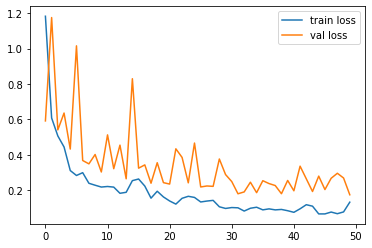

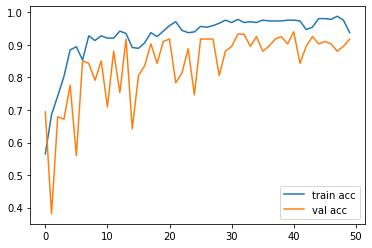

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Dataset/model_vgg19.h5')

In [26]:

y_pred = model.predict(test_set)


In [27]:
y_pred

array([[3.64566743e-01, 6.35433197e-01],
       [9.98996675e-01, 1.00338447e-03],
       [9.99921918e-01, 7.80726841e-05],
       [8.30058992e-01, 1.69941023e-01],
       [2.38376647e-01, 7.61623383e-01],
       [1.58097714e-01, 8.41902256e-01],
       [9.26566869e-02, 9.07343328e-01],
       [6.00681379e-02, 9.39931870e-01],
       [9.99809325e-01, 1.90739505e-04],
       [7.64622569e-01, 2.35377431e-01],
       [9.99985456e-01, 1.45553004e-05],
       [9.99664545e-01, 3.35453893e-04],
       [9.99966860e-01, 3.31424344e-05],
       [9.83190835e-01, 1.68091226e-02],
       [5.32903612e-01, 4.67096418e-01],
       [9.05105621e-02, 9.09489393e-01],
       [9.92252052e-01, 7.74797006e-03],
       [9.47495282e-01, 5.25047481e-02],
       [9.17910516e-01, 8.20894465e-02],
       [2.14550376e-01, 7.85449624e-01],
       [9.98692453e-01, 1.30761776e-03],
       [1.00000000e+00, 1.01521671e-08],
       [5.90232834e-02, 9.40976739e-01],
       [3.11168522e-01, 6.88831508e-01],
       [7.012707

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('/content/drive/My Drive/Dataset/model_vgg19.h5')

In [32]:
img=image.load_img('/content/drive/My Drive/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [33]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[8.5184106e-04, 9.9914813e-01]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
